<a href="https://colab.research.google.com/github/Weff24/PrivacyPlate/blob/main/pp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Extraction from XML Files

In [46]:
from google.colab import drive
drive.mount('/content/drive')

import xml.etree.ElementTree as ET
import os
import sys
from collections import defaultdict

from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import matplotlib.patches as patches

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. XML Data Extraction: License Plate Crop Borders

In [53]:
# Path to annotation folder
annot_dir_path = Path("/content/drive/MyDrive/01-License Plates/annotations")

if not annot_dir_path.exists():
  print("Annotation directory path does not exist")
  sys.exit(1)

# Extract the box from xml files
box_locations = defaultdict(list)
box_elements = ['xmin', 'ymin', "xmax", "ymax"] # order of the box location

for path in os.listdir(annot_dir_path):
    tree = ET.parse(f'{annot_dir_path}/{path}')  # Replace 'your_xml_file.xml' with your XML file path
    root = tree.getroot()

    # Get key from XML
    xml_ind =int(path[4:-4])

    for element in box_elements:
      box_locations[xml_ind].append(int(root.find('object').find('bndbox').find(element).text))

defaultdict(<class 'list'>, {0: [226, 125, 419, 173], 1: [134, 128, 262, 160], 101: [167, 202, 240, 220], 107: [141, 113, 311, 164], 106: [138, 79, 177, 92], 100: [175, 114, 214, 131], 103: [230, 129, 248, 134], 10: [140, 5, 303, 148], 105: [152, 147, 206, 159], 104: [195, 266, 244, 282], 102: [66, 147, 322, 199], 245: [91, 110, 164, 138], 343: [110, 186, 162, 209], 192: [108, 150, 211, 173], 84: [167, 201, 238, 220], 215: [92, 105, 162, 123], 410: [51, 150, 219, 212], 178: [126, 180, 173, 205], 98: [85, 196, 247, 259], 97: [98, 102, 297, 191], 13: [191, 147, 242, 169], 32: [200, 149, 251, 167], 113: [151, 113, 306, 180], 424: [128, 173, 461, 242], 70: [179, 115, 213, 133], 417: [90, 145, 273, 196], 243: [129, 174, 465, 235], 196: [105, 128, 130, 140], 210: [54, 90, 315, 159], 125: [280, 196, 355, 257], 185: [154, 147, 293, 194], 40: [261, 186, 317, 211], 61: [71, 124, 198, 231], 191: [96, 189, 199, 217], 233: [189, 55, 259, 78], 63: [54, 201, 91, 226], 383: [54, 216, 88, 228], 347: [2

# 2. License Plate Image Data Import

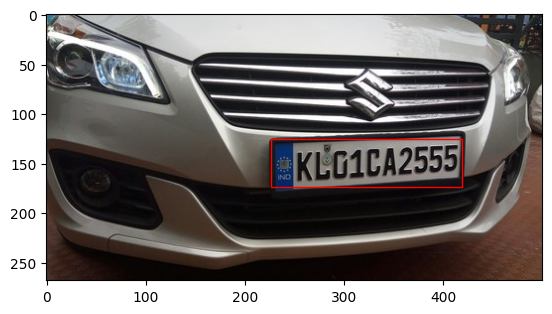

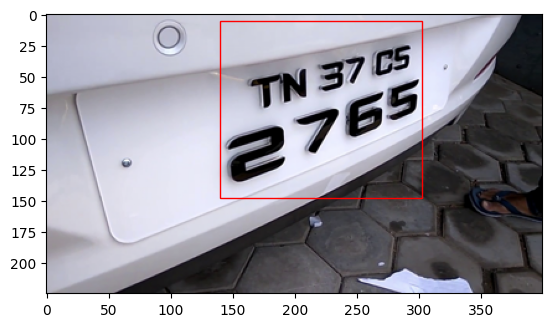

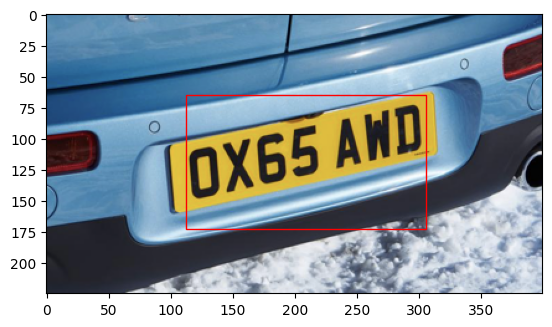

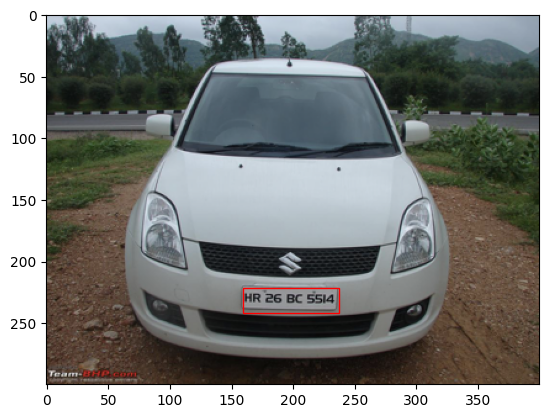

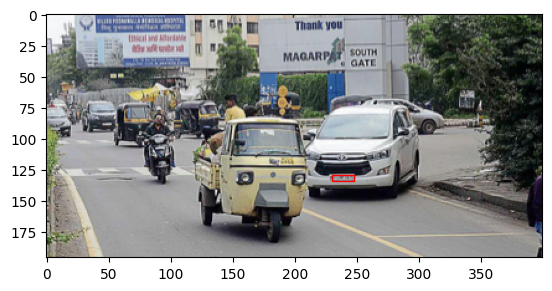

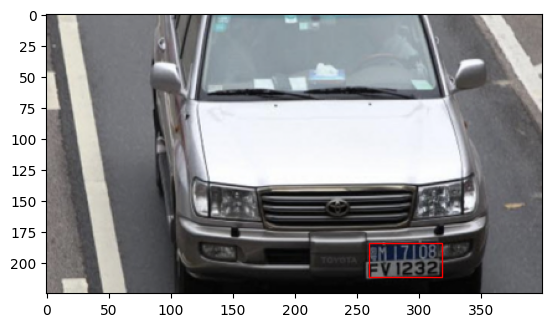

In [54]:
img_dir_path = Path("/content/drive/MyDrive/01-License Plates/images")

if not img_dir_path.exists():
  print("Image directory path does not exist")
  sys.exit(1)

images = []

i = 0
for i, path in enumerate(os.listdir(img_dir_path)):
  image = mpimg.imread(f"{img_dir_path}/{path}")
  fig, ax = plt.subplots()

  ax.imshow(image)

  # Red box around to see the license plate
  box = box_locations[int(path[4:-4])]
  rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

  plt.show()


  i += 1
  if i > 5:
    break